# Pandas 数据结构

numpy能够帮助我们处理数值型数据，但是我们还会有字符串，时间序列等类型的数据需要被处理，所以我们还需要使用pandas。

pandas是一个Python Data Analysis Library（数据分析库），是基于numpy的一个开源的Python库，被广泛的用语数据分析，数据清洗等工作。

In [2]:
# 导入Pandas
import pandas as pd  # 为了方便，我们将pandas缩写成pd

**Series**

pandas series 类似表格种的一个 列 column

语法为：
```
pd.Series(data, index, dtype, name, copy)
```

其中的参数是：
1. data：一组数据，可以是字典，也可以是ndarray或者标量
2. index：数据索引标签，如果不指定，默认从0开始
3. dtype：数据类型，默认会自己判断
4. name：设置名称
5. copy：拷贝数据，默认为False

In [3]:
# 创建方法

# 从列表创建

s1 = pd.Series([1, 2, 3, 4, 5])
print(s1)

0    1
1    2
2    3
3    4
4    5
dtype: int64


In [4]:
# 从ndarrday创建
import numpy as np  # 同样，缩写

s2 = pd.Series(np.arange(5), index=['a', 'b', 'c', 'd', 'e'])
print(s2)

a    0
b    1
c    2
d    3
e    4
dtype: int32


In [5]:
# 从字典创建

temp_dict = {"name":"zhangsan", "age":27, "tel":10087}

# 从字典数据直接传入data

s3 = pd.Series(temp_dict)
print(s3)

name    zhangsan
age           27
tel        10087
dtype: object


In [6]:
# 从标量值进行构造

s4 = pd.Series(1., index=list("abcde"))
print(s4)

a    1.0
b    1.0
c    1.0
d    1.0
e    1.0
dtype: float64


In [7]:
# 我们可以将其写成函数

# coding: utf-8
def create_series() -> pd.core.series.Series:
    """
    :return: return a Series, def create_series() -> Series:
    """

    s = pd.Series(np.arange(4), index=list("abcd"), name="python")
    
    return s

series = create_series()
print(series)

a    0
b    1
c    2
d    3
Name: python, dtype: int32


In [8]:
# 切边与索引，使用s2

print(s2[0])

0


In [9]:
print(s2[:3])

a    0
b    1
c    2
dtype: int32


In [10]:
print(s2[[1, 0, 2]])

b    1
a    0
c    2
dtype: int32


In [11]:
print(s2[s2>2])  # 将s2种所有大于2的数字打印出来

d    3
e    4
dtype: int32


In [12]:
print(s2["a"])  # 像使用字典一样进行使用

0


**Series 与 Python 的 Dict 类型对比**

二者都存在映射关系，字典是一种将任意键映射到一组任意值的数据结构，而 Series 对象其实是一种将类型键映射到一组类型值的数据结构，类型至关重要。

就像 Numpy 数组背后特定类型的经过编译的代码使得它在某些操作上比普通的 Python 列表更加高效一样，Pandas Serise 的类型信息适得它在某些操作上比 Python 的字典更高效。另外，和字典不同，Series 对象还支持数组形式的操作，比如切片。

In [13]:
# 使用numpy进行运算

# 向量化操作 - 对应位置相加
result1 = s2 + s2
print(result1)

a    0
b    2
c    4
d    6
e    8
dtype: int32


In [14]:
# 想量化操作 - 对应位置相乘
result2 = s2 * s2
print(result2)

a     0
b     1
c     4
d     9
e    16
dtype: int32


In [15]:
# 每个位置加2
result3 = s2 + 2
print(result3)

a    2
b    3
c    4
d    5
e    6
dtype: int32


In [16]:
# 自动对齐
# Series 的操作默认是使用 index 的值进行对齐的,而不是相对位置

print(s2[1:])

b    1
c    2
d    3
e    4
dtype: int32


In [17]:
print(s2[:-1])

a    0
b    1
c    2
d    3
dtype: int32


In [18]:
# 我们接着将这两个进行相加
print(s2[1:]+s2[:-1])

a    NaN
b    2.0
c    4.0
d    6.0
e    NaN
dtype: float64


对于 s2[1:] 而言，缺失了a的值；对于 s2[:-1] 而言，缺失了e的值。

进行相加的时候，因为分别缺失了这两个位置的值，所以采用的是将其标注为NaN的方法，也就是将不能够对齐的数据当作是缺失值来进行处理。

**series关于缺失值的检测**

Series.isna()可以用来检测缺失值，语法为：
```
Series.isna()
```

Series.fillna()可以用来填充缺失值，语法为：
```
Series.fillna(value=None, method=None, axix=None, inplace=False, limit=None, downcast=None)
```
其中的参数是：
1. values：dect，Series或者DataFrame（填充nan的值，不能够是list）
2. method：{‘backfill’, ‘bfill’, ‘pad’, ‘ffill’, None}, default None (填充方法，用前/后面的值进行填充)。
3. axis： {0 or ‘index’} (前后或上下填充)
4. limit： nt, default None (连续填充的值的数量)

Series.dropna()用来删除缺失值，语法为：
```
Series.dropna(axis=0, inplace=False, how=None)
```
其中的参数是：
1. axis：默认为0，表示逢空值剔除整行，如果设置参数 axis＝1 表示逢空值去掉整列。
2. inplace： 如果设置 True，将计算得到的值直接覆盖之前的值并返回 None，修改的是源数据。
3. how： 默认为 any 如果一行（或一列）里任何一个数据有出现 NA 就去掉整行，如果设置 how='all' 一行（或列）都是 NA 才去掉这整行。

In [19]:
# 首先创建一个带缺失值的Series
s = pd.Series([1, 2, None, 4, None])

#检测是否存在着缺失值
print(s.isna())

0    False
1    False
2     True
3    False
4     True
dtype: bool


In [20]:
# 填充缺失值
print(s.fillna(0.))

0    1.0
1    2.0
2    0.0
3    4.0
4    0.0
dtype: float64


In [21]:
# 我们可以在定义时指定name属性

s = pd.Series(np.arange(5), name = "something")
print(s.name)

something


In [22]:
# 通过 index 和 values 来查看Series的内容
s = pd.Series(np.arange(5), index = list("abcde"))

# 通过index来查看索引
print(s.index)

Index(['a', 'b', 'c', 'd', 'e'], dtype='object')


In [23]:
# 通过values来查看值

print(s.values)

[0 1 2 3 4]


**DataFrame**

DataFrame是pandas种的二维数据结构，可以看成一个Excel中的工作表，亦或者是SQL表，或者是存储了Series对象的字典，并且它含有一组有序的列，每列可以是不同的值类型。

DataFrame既有行索引也有列索引，它可以被看作由 Series 组成的字典（共同用一个索引），其中的index用于指定行的label，columns用于指定列的label，如果参数不传入，那么会按照传入的内容进行设定。

DataFrame 是一个二维的 ndarray，构造的方法如下所示：

```
pandas.DataFrame(data, index, columns, dtype, copy)
```

参数如下所示：
1. data：一组数据，比如：ndarray，series，map或者lists等
2. index：索引值，或者可以成为行标签
3. columns：列标签，默认为RangeIndex（0,1,2，...，n）
4. dtype：数据类型
5. copy：拷贝数据，默认为False

In [24]:
# 使用单个列表创建

data = [1, 2, 3, 4, 5]
df = pd.DataFrame(data)

print(df)

   0
0  1
1  2
2  3
3  4
4  5


In [25]:
# 使用嵌套列表创建并指定列索引

data = [["xiaoming", 10], ["xiaohong", 11], ["xiaozhang", 12]]
df = pd.DataFrame(data, columns=["Name", "Age"])

print(df)

        Name  Age
0   xiaoming   10
1   xiaohong   11
2  xiaozhang   12


In [26]:
# 从字典创建

# 使用数组创建
data = {"Name":["xiaoming", "zhangsan", "lisi"], "Age":[10, 11, 12]}
df = pd.DataFrame(data)

print(df)

       Name  Age
0  xiaoming   10
1  zhangsan   11
2      lisi   12


In [27]:
# 从字典列表创建

data = [{'a':1, 'b':2}, {'a':5, 'b':6, 'c':7}]
df = pd.DataFrame(data, index=["first", "second"]) # 指定行索引

print(df)  # 如果有缺失，则自动填充为NaN值

        a  b    c
first   1  2  NaN
second  5  6  7.0


## 基本属性与整体情况查询

DataFrame的基础属性有：
1. df.shape：形状，行数列数
2. df.dtypes：列数据类型
3. df.ndim：数据维度
4. df.index：行索引
5. df.columns：列索引
6. df.values：对象值，二维ndarray数组

DataFrame的整体情况查询：
1. df.head()：显示头部几行
2. df.tail()：显示尾部几行
3. df.info()：显示相关信息，比如说行数，列数，列索引，列非空值个数，列类型，内存占用
4. df.describe()：快速总和统计结果，计数，均值，标准差，最大值，四分位数，最小值。

In [28]:
# 我们构建一个DataFrame结构

df = pd.DataFrame(np.random.randn(6,4), columns=list("ABCD"))  # 所以生成
print(df)

          A         B         C         D
0 -1.593162 -0.183747 -0.256429 -0.718094
1  0.743444  0.742997 -1.428645 -1.785965
2  0.255944 -0.888109  1.552158 -0.676974
3  1.251777  2.095795 -0.260908  0.261940
4  0.774631 -1.331098  0.170060  0.806067
5  0.102216  0.281761  0.804488 -0.571827


In [29]:
# 或者我们也可以向DataFrame进行字典传入数据

df2 = pd.DataFrame({'A':1.,
                  'B':pd.Timestamp('20130102'),
                  'C:':pd.Series(1, index=list(range(4)), dtype="float32"),
                   'D':np.array([3]*4, dtype="int32"),
                   'E':pd.Categorical(["test", "train", "test", "train"]),
                   'F':'foo'})

print(df2)

     A          B   C:  D      E    F
0  1.0 2013-01-02  1.0  3   test  foo
1  1.0 2013-01-02  1.0  3  train  foo
2  1.0 2013-01-02  1.0  3   test  foo
3  1.0 2013-01-02  1.0  3  train  foo


字典的每个key代表一列，其中value可以是各种能够转换为Series的对象。

series要求所有的类型都一致，而DataFrame值要求每一列数据的格式相同。

In [30]:
# 我们来查看一下数据
print(df2.dtypes)

A            float64
B     datetime64[ns]
C:           float32
D              int32
E           category
F             object
dtype: object


In [31]:
print(df2.shape)

(4, 6)


In [32]:
print(df2.ndim)

2


In [33]:
# 头尾数据

print(df.head(3))  # 查看头三行的数据

          A         B         C         D
0 -1.593162 -0.183747 -0.256429 -0.718094
1  0.743444  0.742997 -1.428645 -1.785965
2  0.255944 -0.888109  1.552158 -0.676974


In [34]:
print(df.tail(3))  # 查看尾部三行的数据

          A         B         C         D
3  1.251777  2.095795 -0.260908  0.261940
4  0.774631 -1.331098  0.170060  0.806067
5  0.102216  0.281761  0.804488 -0.571827


In [35]:
# 使用index查看行索引
print(df.index)

RangeIndex(start=0, stop=6, step=1)


In [36]:
# 使用columns查看列索引
print(df.columns)

Index(['A', 'B', 'C', 'D'], dtype='object')


In [37]:
# 使用values查看数据
print(df.values)

[[-1.59316207 -0.18374661 -0.25642935 -0.71809394]
 [ 0.74344351  0.7429974  -1.42864489 -1.78596498]
 [ 0.25594383 -0.88810928  1.55215826 -0.67697367]
 [ 1.25177673  2.09579466 -0.26090801  0.26193986]
 [ 0.77463057 -1.33109809  0.17006023  0.8060673 ]
 [ 0.10221606  0.2817609   0.80448756 -0.57182743]]


In [38]:
# 使用info查看df2的基本信息
print(df2.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4 entries, 0 to 3
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   A       4 non-null      float64       
 1   B       4 non-null      datetime64[ns]
 2   C:      4 non-null      float32       
 3   D       4 non-null      int32         
 4   E       4 non-null      category      
 5   F       4 non-null      object        
dtypes: category(1), datetime64[ns](1), float32(1), float64(1), int32(1), object(1)
memory usage: 288.0+ bytes
None


In [39]:
print(df)

          A         B         C         D
0 -1.593162 -0.183747 -0.256429 -0.718094
1  0.743444  0.742997 -1.428645 -1.785965
2  0.255944 -0.888109  1.552158 -0.676974
3  1.251777  2.095795 -0.260908  0.261940
4  0.774631 -1.331098  0.170060  0.806067
5  0.102216  0.281761  0.804488 -0.571827


In [40]:
# 使用 describe查看统计结果
print(df.describe())

              A         B         C         D
count  6.000000  6.000000  6.000000  6.000000
mean   0.255808  0.119600  0.096787 -0.447475
std    0.994103  1.227378  1.020193  0.895272
min   -1.593162 -1.331098 -1.428645 -1.785965
25%    0.140648 -0.712019 -0.259788 -0.707814
50%    0.499694  0.049007 -0.043185 -0.624401
75%    0.766834  0.627688  0.645881  0.053498
max    1.251777  2.095795  1.552158  0.806067


In [41]:
# 可以使用 .T 来转置df
print(df.T)

          0         1         2         3         4         5
A -1.593162  0.743444  0.255944  1.251777  0.774631  0.102216
B -0.183747  0.742997 -0.888109  2.095795 -1.331098  0.281761
C -0.256429 -1.428645  1.552158 -0.260908  0.170060  0.804488
D -0.718094 -1.785965 -0.676974  0.261940  0.806067 -0.571827


## 索引

虽然DataFrame 支持 ndarray 的索引语法，但是推荐使用 .loc，.iloc 方法来进行索引

In [42]:
# 我们创建一个6行3列的正太分布结构

df = pd.DataFrame(np.random.randn(6,4), index=list("abcdef"), columns=list("ABCD"))
print(df)

          A         B         C         D
a -0.209089  1.460903 -0.774186  1.071432
b  0.180691 -1.298926  0.032505 -1.877595
c  1.480017 -0.529967 -0.496745 -0.881392
d  0.364233 -0.918856  1.318477  1.350162
e -1.175525  0.050099  0.358032 -1.476623
f -1.088668  2.668866 -0.862178 -1.233069


In [43]:
# 接着我们来创建一个3行4列的结构

df2 = pd.DataFrame(np.arange(12).reshape(3, 4), index=list('abc'), columns=list("WXYZ"))
print(df2)

   W  X   Y   Z
a  0  1   2   3
b  4  5   6   7
c  8  9  10  11


In [44]:
# 读取单列
print(df["A"])

a   -0.209089
b    0.180691
c    1.480017
d    0.364233
e   -1.175525
f   -1.088668
Name: A, dtype: float64


In [45]:
print(df[["A", "C"]])

          A         C
a -0.209089 -0.774186
b  0.180691  0.032505
c  1.480017 -0.496745
d  0.364233  1.318477
e -1.175525  0.358032
f -1.088668 -0.862178


In [46]:
# 或者我们可以使用 df.A 来读取列
print(df.A)

a   -0.209089
b    0.180691
c    1.480017
d    0.364233
e   -1.175525
f   -1.088668
Name: A, dtype: float64


In [47]:
# 行索引读取行
# 使用切片读取多行
print(df[0:3])

          A         B         C         D
a -0.209089  1.460903 -0.774186  1.071432
b  0.180691 -1.298926  0.032505 -1.877595
c  1.480017 -0.529967 -0.496745 -0.881392


In [48]:
# 行索引读取
print(df["a":"c"])

          A         B         C         D
a -0.209089  1.460903 -0.774186  1.071432
b  0.180691 -1.298926  0.032505 -1.877595
c  1.480017 -0.529967 -0.496745 -0.881392


In [49]:
# 读取多行多列
print(df["a":"c"][["A","D"]])

          A         D
a -0.209089  1.071432
b  0.180691 -1.877595
c  1.480017 -0.881392


In [50]:
# 使用 .loc
print(df2.loc['a'])

W    0
X    1
Y    2
Z    3
Name: a, dtype: int32


In [51]:
# 查询多行
print(df2.loc[["a", "c"]])

   W  X   Y   Z
a  0  1   2   3
c  8  9  10  11


In [52]:
# 连续切片
print(df2.loc[['a', 'b'], ["W", "Y"]])

   W  Y
a  0  2
b  4  6


In [53]:
print(df2.loc[df2.index[0:2], ["W", "Y"]])

   W  Y
a  0  2
b  4  6


In [54]:
print(df2.loc['a':'c', 'W':'Y'])

   W  X   Y
a  0  1   2
b  4  5   6
c  8  9  10


In [55]:
# 使用 .iloc
# 获取前两行
print(df2.iloc[0:2])

   W  X  Y  Z
a  0  1  2  3
b  4  5  6  7


In [56]:
# 获取前2行前3列
print(df2.iloc[0:2, 0:3])

   W  X  Y
a  0  1  2
b  4  5  6


In [57]:
# 获取所有行，前2列
print(df2.iloc[:, 0:2])

   W  X
a  0  1
b  4  5
c  8  9


In [58]:
# 获取前2行，所有列
print(df2.iloc[0:2, :])

   W  X  Y  Z
a  0  1  2  3
b  4  5  6  7


布尔索引被定义为 numpy 的一个非常重要的功能, 它在 Pandas 中经常使用。它的主要任务是使用 DataFrame 中数据的实际值。

In [59]:
print(df > 0)

       A      B      C      D
a  False   True  False   True
b   True  False   True  False
c   True  False  False  False
d   True  False   True   True
e  False   True   True  False
f  False   True  False  False


我们会发现大于0的地方为 True ，小于0的地方为 False

In [60]:
# 我们尝试获取所有 A 列大于0的行：
print(df['A'] > 0)

a    False
b     True
c     True
d     True
e    False
f    False
Name: A, dtype: bool


In [61]:
print(df[df['A'] > 0])

          A         B         C         D
b  0.180691 -1.298926  0.032505 -1.877595
c  1.480017 -0.529967 -0.496745 -0.881392
d  0.364233 -0.918856  1.318477  1.350162


In [62]:
# 我们也能传入多个条件，不同的条件之间需要用括号括起来。

print(df2[(df2 > 1) & (df2 < 10)])

     W    X    Y    Z
a  NaN  NaN  2.0  3.0
b  4.0  5.0  6.0  7.0
c  8.0  9.0  NaN  NaN


## 层次化索引

In [63]:
# 我们来创建一个series数据结构
data = [16, 17, 21, 18, 19, 22]

s = pd.Series(data, index=[["first", "first", "second", "second", "third", "third"], ["male", "female", "male", "female", "male", "female"]])
print(s)

first   male      16
        female    17
second  male      21
        female    18
third   male      19
        female    22
dtype: int64


In [64]:
# 显示层次化索引
print(s.index)

MultiIndex([( 'first',   'male'),
            ( 'first', 'female'),
            ('second',   'male'),
            ('second', 'female'),
            ( 'third',   'male'),
            ( 'third', 'female')],
           )


In [65]:
# DataFrame 层次化索引
data = np.random.randint(10, 20, (6, 9))  # [10， 20)之间的随机整数
index = [["first", "first", "second", "second", "third", "third"], ["male", "female", "male", "female", "male", "female"]]
columns = [["Ch", "Ch", "Ch", "Ma", "Ma", "Ma", "En", "En", "En"], ["A", "B", "C", "A", "B", "C", "A", "B", "C"]]
df = pd.DataFrame(data, index=index, columns=columns)

print(df)

               Ch          Ma          En        
                A   B   C   A   B   C   A   B   C
first  male    16  16  16  17  10  15  11  10  12
       female  19  16  10  15  15  13  10  15  16
second male    17  12  13  17  14  13  17  11  19
       female  13  19  11  10  10  13  18  10  14
third  male    17  13  17  16  15  11  15  15  12
       female  14  12  16  19  11  16  12  12  13


In [66]:
# 显示层次化索引
print(df.index)

MultiIndex([( 'first',   'male'),
            ( 'first', 'female'),
            ('second',   'male'),
            ('second', 'female'),
            ( 'third',   'male'),
            ( 'third', 'female')],
           )


In [67]:
print(df.columns)

MultiIndex([('Ch', 'A'),
            ('Ch', 'B'),
            ('Ch', 'C'),
            ('Ma', 'A'),
            ('Ma', 'B'),
            ('Ma', 'C'),
            ('En', 'A'),
            ('En', 'B'),
            ('En', 'C')],
           )


In [68]:
# 按层级统计数据
print(s["first"])

male      16
female    17
dtype: int64


In [69]:
# 获取一二班的男女生人数
print(s["first":"second"])

first   male      16
        female    17
second  male      21
        female    18
dtype: int64


In [70]:
print(s[["first", "third"]])

first  male      16
       female    17
third  male      19
       female    22
dtype: int64


In [71]:
# 获取一班的男生人数
print(s["first", "male"])

16


In [72]:
print(s[:, "female"])

first     17
second    18
third     22
dtype: int64


In [73]:
# 获取一班的男生人数
print(s["first"]["male"])

16


In [74]:
# 获取各班的女生人数
print(s["first":"thrid"][:, "female"])

first     17
second    18
third     22
dtype: int64


In [75]:
# 获取各班的学生数学成绩各等级人数
print(df["Ma"])

                A   B   C
first  male    17  10  15
       female  15  15  13
second male    17  14  13
       female  10  10  13
third  male    16  15  11
       female  19  11  16


In [76]:
# 获取一班的所有项
print(df.loc["first"])

        Ch          Ma          En        
         A   B   C   A   B   C   A   B   C
male    16  16  16  17  10  15  11  10  12
female  19  16  10  15  15  13  10  15  16


In [77]:
# 获取一班男女英语成绩各等级的人数
print(df.loc["first", "En"])

         A   B   C
male    11  10  12
female  10  15  16


In [78]:
# 获取各班语文成绩为A的人数
print(df["Ch"]["A"])

first   male      16
        female    19
second  male      17
        female    13
third   male      17
        female    14
Name: A, dtype: int32


In [79]:
# 获取一班男女生的语文和英语成绩各等级人数:
print(df.loc["first", ["Ch", "En"]])

        Ch          En        
         A   B   C   A   B   C
male    16  16  16  11  10  12
female  19  16  10  10  15  16


In [80]:
print(df.loc["first", "Ch"]["A"])

male      16
female    19
Name: A, dtype: int32


In [81]:
print(df.loc["first",:].loc["male"])

Ch  A    16
    B    16
    C    16
Ma  A    17
    B    10
    C    15
En  A    11
    B    10
    C    12
Name: male, dtype: int32


## 数据的合并

pandas提供了merge和join两个方法来完成数据的合并，merge方法主要基于两个DataFrame的共同列进行合并，join方法则是主要基于两个DataFrame的索引进行合并。

merge方法是基于共同的列，将两个DataFrame进行合并，语法如下所示：
```
pandas.merge(left, right, how="inner", on=None, left_on=None, right_on=None, left_index=False, right_index=False, sort=False, suffixes=('_x', '_y'), copy=True, indicator=False, validate=None)
```

参数说明：
1. left/right：左/右位置的 DataFrame。
2. how：数据合并的方式。
3. left：基于左 DataFrame 列的数据合并；right：基于右DataFrame列的数据合并；outer：基于列的数据外合并（取并集）；inner：基于列的数据内合并（取交集）；默认为inner。
4. on：用来合并的列名，这个参数需要保证两个 DataFrame 有相同的列名。
5. left_on/right_on：左/右 DataFrame 合并的列名，也可为索引，数组和列表。
6. left_index/right_index：是否以 index 作为数据合并的列名，True 表示是。
7. sort：根据 DataFrame 合并的 keys 排序，默认是 True。
8. suffixes: 若有相同列且该列没有作为合并的列，可通过 suffixes 设置该列的后缀名，一般为元组和列表类型。

In [82]:
# 创建两个DataFrame

df1 = pd.DataFrame({'key':['s','s','w','x','x','n','f','c'], 'data1':range(8)})
print(df1)

  key  data1
0   s      0
1   s      1
2   w      2
3   x      3
4   x      4
5   n      5
6   f      6
7   c      7


In [83]:
df2 = pd.DataFrame({'key':['w','w','s','s','x','f'], 'data2':range(6)})
print(df2)

  key  data2
0   w      0
1   w      1
2   s      2
3   s      3
4   x      4
5   f      5


In [84]:
# 默认情况之下的合并

print(pd.merge(df1, df2))

  key  data1  data2
0   s      0      2
1   s      0      3
2   s      1      2
3   s      1      3
4   w      2      0
5   w      2      1
6   x      3      4
7   x      4      4
8   f      6      5


可以发现有些一行消失了，因为默认使用的是inner内链接方式，结果做的是交集。

In [85]:
print(pd.merge(df1, df2, how="outer", on="key"))

   key  data1  data2
0    s      0    2.0
1    s      0    3.0
2    s      1    2.0
3    s      1    3.0
4    w      2    0.0
5    w      2    1.0
6    x      3    4.0
7    x      4    4.0
8    n      5    NaN
9    f      6    5.0
10   c      7    NaN


outer 外链接方式，可以理解为基于共同列的并集进行链接，参数on设置链接的共有列名。

若两个DataFrame间出了on设置的连接列外并无相同列，则该列的值设置为NaN。

In [86]:
# 左链接
print(pd.merge(df1, df2, how="left"))

   key  data1  data2
0    s      0    2.0
1    s      0    3.0
2    s      1    2.0
3    s      1    3.0
4    w      2    0.0
5    w      2    1.0
6    x      3    4.0
7    x      4    4.0
8    n      5    NaN
9    f      6    5.0
10   c      7    NaN


left 是左链接，可以理解为基于左边位置的DataFrame的进行行连接。

In [87]:
# 基于多列的连接
df1 = pd.DataFrame({'key1': ['foo', 'foo', 'bar'], 'key2': ['one', 'two', 'one'],'val': [1, 2, 3]})
print(df1)

  key1 key2  val
0  foo  one    1
1  foo  two    2
2  bar  one    3


In [88]:
df2 = pd.DataFrame({'key1': ['foo', 'foo','bar','bar'], 'key2': ['one', 'one', 'one','two'],'val': [4,5,6,7]})
print(df2)

  key1 key2  val
0  foo  one    4
1  foo  one    5
2  bar  one    6
3  bar  two    7


In [89]:
# 多列的右连接
print(pd.merge(df1, df2, on=["key1", "key2"], how="right"))

  key1 key2  val_x  val_y
0  foo  one    1.0      4
1  foo  one    1.0      5
2  bar  one    3.0      6
3  bar  two    NaN      7


当合并的数据有相同的列时，结构会默认在后面添加 _x, _y 来区分，我们也可以通过 suffixes 参数来手动指定：

In [90]:
print(pd.merge(df1, df2, on=["key1", "key2"], suffixes=["_left", "_right"]))

  key1 key2  val_left  val_right
0  foo  one         1          4
1  foo  one         1          5
2  bar  one         3          6


join 方法更为方便的实现行索引上的合并，语法为：
```
DataFrame.join(other, on=None, how='left', lsuffix='', rsuffix='', sort=False)
```
参数说明：
1. other：DataFrame，或者带有名字的 Series，或者 list，如果传递的是 Series，那么其 name 属性应当是一个集合，并且该集合将会作为结果 DataFrame 的列名。
2. on：列名称，或者列名称的 list/tuple，或者类似形状的数组连接的列，默认使用索引连接。
3. how： {‘left’, ‘right’, ‘outer’, ‘inner’} , 连接的方式，默认为左连接。
4. lsuffix：String 左 DataFrame 中重复列的后缀。
5. rsuffix：String 右 DataFrame 中重复列的后缀。
6. sort：按照字典顺序对结果在连接键上排序。如果为False，连接键的顺序取决于连接类型（关键字）。

In [91]:
# 简单创建两个DataFrame

df1 = pd.DataFrame(np.arange(8).reshape(2, 4), index=["one", "two"], columns=list("ABCD"))
print(df1)

     A  B  C  D
one  0  1  2  3
two  4  5  6  7


In [92]:
df2 = pd.DataFrame(np.arange(12).reshape(3, 4), index=["one", "two", "three"], columns=list("WXYZ"))
print(df2)

       W  X   Y   Z
one    0  1   2   3
two    4  5   6   7
three  8  9  10  11


In [93]:
# 默认情况之下进行合并
print(df1.join(df2))

     A  B  C  D  W  X  Y  Z
one  0  1  2  3  0  1  2  3
two  4  5  6  7  4  5  6  7


可以发现，df1和df2按照相同的行索引进行了合并，并且df2的第三行被删除了。

In [94]:
print(df2.join(df1))

       W  X   Y   Z    A    B    C    D
one    0  1   2   3  0.0  1.0  2.0  3.0
two    4  5   6   7  4.0  5.0  6.0  7.0
three  8  9  10  11  NaN  NaN  NaN  NaN


可见会以前者的索引为基准来进行合并，并且不足的地方会自动填充 NaN 值，超出的地方会自动删除。

## 分割和组合

分组的过程可以分为：

1. 拆分： 进行分组的根据
2. 应用： 每个分组运行的计算规则
3. 合并： 把每个分组的计算结果合并起来

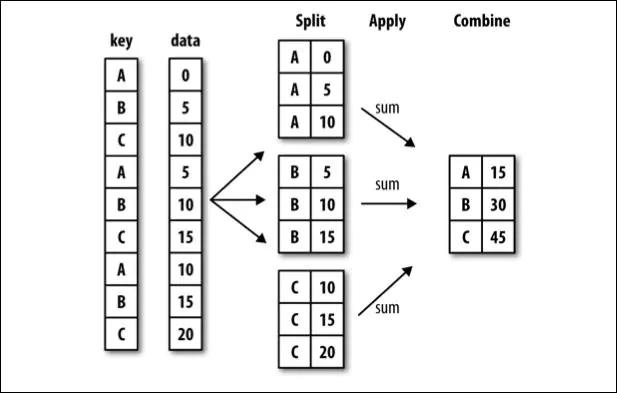

分组功能主要利用pandas的groupby函数。

虽然分组用其他函数也可以完成，但是groupby这个函数相对来说比较方便。

groupby的语法为：
```
DataFrame.groupby(by=None, axis=0, level=None, as_index=True, sort=True, group_keys=True, squeeze=<no_default>, observed=False, dropna=True)
```

参数为：
1. by：接收 list，string，mapping，generator等，用语确定分组的依据，没有默认值
2. axis：接收int，表示操作的轴向，默认为0，对列进行操作
3. level：接收 int 或者索引名，代表标签所在级别
4. as_index：表示聚合后的聚合标签是否以DataFrame索引形式输出，默认为True
5. sort：表示是否对分组依据分组标签进行排序
6. group_keys：表示是否允许的情况返回数据进行降为
7. squeeze：表示是否允许的情况下对返回数据进行降为

In [95]:
data = {"lessons": ['Ch', 'En', 'Ch', 'En', 'Ch', 'Ma', 'En', 'Ma'],
         	  "grade": ['A', 'A', 'B', 'B', 'C', 'A', 'C', 'B'],
        	  "male": np.random.randint(10, 20, 8),  # [10, 20)的8个随机整数
       	 	  "female": np.random.randint(10, 20, 8)}
df = pd.DataFrame(data)
print(df)

  lessons grade  male  female
0      Ch     A    10      14
1      En     A    12      14
2      Ch     B    18      11
3      En     B    12      13
4      Ch     C    12      16
5      Ma     A    18      12
6      En     C    13      15
7      Ma     B    15      12


In [96]:
# 对课程lessons分组，我们可以得到什么呢？
print(df.groupby(by="lessons"))

此时，并没有进行任何的计算，而是返回了一个 DataFrameGroupBy 对象，用groupby方法分组后的结果并不能直接查看，而是被存在内存中，输出的是内存地址。

DataFrameGroupBy 对象有很多经过优化的方法：
1. count：计算分组种非NA值的数量
2. sum：计算非NA的值的和
3. mean：计算非NA的值的平均数
4. median：计算非NA值的算术中位数
5. std，var：无偏（分母为n-1）标准差和方差
6. min，max：非NA的值的最小值和最大值

In [97]:
# 各等级的男生人数
group1 = df.groupby(by="grade")
print(group1.sum())

       male  female
grade              
A        40      40
B        45      36
C        25      31


In [98]:
# size()返回每个分组的元素个数
group2 = df.groupby(by="lessons")
print(group2.count())

         grade  male  female
lessons                     
Ch           3     3       3
En           3     3       3
Ma           2     2       2


In [99]:
print(group2.size())

lessons
Ch    3
En    3
Ma    2
dtype: int64


In [100]:
# 按照学科和成绩进行分组
group3 = df.groupby(by=[df["lessons"], df["grade"]])
print(group3.sum())

               male  female
lessons grade              
Ch      A        10      14
        B        18      11
        C        12      16
En      A        12      14
        B        12      13
        C        13      15
Ma      A        18      12
        B        15      12


In [101]:
# 我们在分组统计之后如果只想查看男生的情况，当然也是可以的
print(df.groupby(by=[df["lessons"], df["grade"]]).sum()["male"])

lessons  grade
Ch       A        10
         B        18
         C        12
En       A        12
         B        12
         C        13
Ma       A        18
         B        15
Name: male, dtype: int32


## 读写数据

如果文件每一行的多 个元素是用逗号隔开的，则这种格式叫作csv。

其他由空格或制表符分隔的列表数据通常存储在各种类型的文本文件中（扩展名一般 为 .txt )。

因此这种文件类型是最常见的数据源，它易于转录和解释。pandas的下列函数专门用来处理 这种文件类型：read_csv、read_table、to_csv。

第一个常见的函数是 read_cvs，语法为：
```
pd.read_csv(filepath, encoding, sep, header, names, usecols, index_col, skiprows, nrows......)
```

参数的含义为：

1. filepath： 文件存储路径，可以用r""进行非转义限定，路径最好是纯英文（文件名也是），不然会经常碰到编码不对的问题，最方便是直接将文件存储在pandas默认的路径下，则直接输入文件名即可
2. encoding: pandas默认编码是utf-8，如果是csv，且数据中有中文时，则要指定encoding=‘gbk’
3. sep: 指定分割符形式，CSV默认逗号分割，可以忽略这个参数，如果是其它分割方式，则要填写
4. header: 指定第一行是否是列名，通常有三种用法，忽略或header=0(表示数据第一行为列名），5. header=None（表明数据没有列名），常与names搭配使用
6. names: 指定列名，通常用一个字符串列表表示，当header=0时，用names可以替换掉第数据中的第一行作为列名，如果header=None，用names可以增加一行作为列名，如果没有header参数时，用names会增加一行作为列名，原数据的第一行仍然保留
7. usecols: 一个字符串列表，可以指定读取的列名
8. index_col: 一个字符串列表，指定哪几列作为索引
9. skiprows: 跳过多少行再读取数据，通常是数据不太干净，需要去除掉表头才会用到
10. nrows: 仅读取多少行，后面的处理也都仅限于读取的这些行



In [102]:
# 我们以泰坦尼克号作为数据例子进行尝试
# 数据文件就在当前的目录之下

data = pd.read_csv("titanic_train.csv")
print(data.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


读取txt文件，参数与cvs是一致的，其中要注意的是txt格式可能会有多种分割符号。

语法为：
```
pd.read_table(filepath,encoding,sep,header,names,usecols,index_col,skiprows,nrows……）
```

我们创建一个名为 temp.txt 的文件，并且给出数据：
```
1, 5, 2, 3, cat
2, 7, 8, 5, dog
3, 3, 6, 7, horse
2, 2, 8, 3, duck
4, 4, 2, 1, mouse 
```

In [103]:
# 我们来使用read_table进行读取

data2 = pd.read_table("temp.txt", sep=',', names=list("abcde"))
print(data2)

   a  b  c  d        e
0  1  5  2  3      cat
1  2  7  8  5      dog
2  3  3  6  7    horse
3  2  2  8  3     duck
4  4  4  2  1   mouse 


我们可以使用to_csv方法把数据写入CSV文件种并生成，语法为：
```
DataFrame.to_csv(path_or_buf, sep, na_rep, float_format, columns, header, index...)  
```

参数的含义是：
1. path_or_buf: 字符串或文件句柄，默认无文件路径或对象，如果没有提供，结果将返回为字符串。
2. sep: 默认字符 **‘ ，’** 输出文件的字段分隔符。
3. na_rep : 默认为 ‘’ 浮点数格式字符串。
4. float_format : 默认为 None, 浮点数格式字符串
5. columns : 顺序，可选列写入.
6. header : 字符串或布尔列表，默认为true,写出列名。如果给定字符串列表，则假定为列名的别名。
7. index : 布尔值，默认为Ture, 写入行名称（索引）

In [104]:
# 我们来将data2写入csv中

data2.to_csv("write.csv")

我们可以在目录中发现：



我们可以再接着导入以下这个文件

In [105]:
data3 = pd.read_csv("write.csv")
print(data3)

   Unnamed: 0  a  b  c  d        e
0           0  1  5  2  3      cat
1           1  2  7  8  5      dog
2           2  3  3  6  7    horse
3           3  2  2  8  3     duck
4           4  4  4  2  1   mouse 


可以发现我们成功了。

## 缺失值数据处理

在使用 python 里的 pandas 库进行数据分析工作时，很多时候我们都会遇到这样一个问题：数据缺失。

In [106]:
# 我们来构建一组包含缺失元素的数组
df = pd.DataFrame(np.random.randn(4, 5), index = ["one", "two", "three", "four"], columns=list("ABCDE"))
df.iloc[0, 2] = np.nan
df.iloc[[1,3], 4] = np.nan

print(df)

              A         B         C         D         E
one   -0.538795  0.335668       NaN -1.527980  1.603514
two    0.402971 -2.613029  0.423040 -0.413605       NaN
three -0.239593  0.600934  1.588833  0.766949 -0.618520
four  -1.098495 -2.117678 -0.734386 -1.231634       NaN


第一个方法是删除缺失值，再遇到某列数据大量丢失的时候，我们常用的方法是：将该含有过多空值的行/列删除，通常这也是一种行之有效的做法。

在pandas种，我们采用dropna函数来实现这一操作。

语法为：
```
DataFrame.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)
```

参数的含义为：
1. axis: axis=0 表示 index 行, axis=1 表示 columns 列，默认为0
2. how: "all" 表示这一行或列中的元素全部缺失，才删除这一行或列，"any" 表示这一行或列中只要有元素缺失，就删除这一行或列
3. thresh: axis 中至少有 thresh 个非缺失值，否则删除。
4. subset: 在某些列的子集中选择出现了缺失值的列删除，不在子集中的含有缺失值得列或行不会删除。
5. inplace: 刷选过缺失值得新数据是存为副本还是直接在原数据上进行修改。默认是 False，即创建新的对象进行修改，原对象不变，和深复制和浅复制有些类似。

In [107]:
# 丢弃所有缺失数据的行得到新的数据
print(df.dropna(how="any"))

              A         B         C         D        E
three -0.239593  0.600934  1.588833  0.766949 -0.61852


有时如果样本过少，我们不适合删除缺失值，常用的方法时将均值、中位值等填充进缺失值，一般用 fillna 函数实现这一操作。

函数语法为：
```
DataFrame.fillna(value=None, method=None, axis=None, inplace=False, limit=None, downcast=None, **kwargs)
```

参数含义为：
1. value: 需要用什么值去填充缺失值
2. axis: 确定填充维度，从行开始或是从列开始
3. method: ffill: 用缺失值前面的一个值代替缺失值，如果 axis =1，那么就是横向的前面的值替换后面的缺失值，如果 axis=0，那么则是上面的值替换下面的缺失值。backfill/bfill，缺失值后面的一个值代替前面的缺失值。注意这个参数不能与value同时出现
4. limit: 确定填充的个数，如果 limit=2，则只填充两个缺失值。

In [108]:
# 以每行均值填充

print(df.fillna(value=df.mean()))

              A         B         C         D         E
one   -0.538795  0.335668  0.425829 -1.527980  1.603514
two    0.402971 -2.613029  0.423040 -0.413605  0.492497
three -0.239593  0.600934  1.588833  0.766949 -0.618520
four  -1.098495 -2.117678 -0.734386 -1.231634  0.492497


使用 isna、isnull 判断缺失值

```
DataFrame.isna()
DataFrame.isnull()
```
isna 判断是否 Nan，一般是数值字段的 null

isnull 主要是判断字符型是否有值， 可以判断所有的空值，但是 python 的数值字段比如 int float 为空的时候默认是 Nan

In [109]:
# 查找缺失值的位置

print(pd.isnull(df))

           A      B      C      D      E
one    False  False   True  False  False
two    False  False  False  False   True
three  False  False  False  False  False
four   False  False  False  False   True


## 数据特征分析

sort_index方法：.sort_index() 方法在指定轴上根据索引进行排序，默认为零轴，升序。

语法为：
```
.sort_index(axis=0,ascending=True)
```

参数为：
1. axis: 指定要排序的轴。
2. ascending : 指递增排序。

In [110]:
df1 = pd.DataFrame(np.arange(20).reshape(4,5), index = list("cabd"))
print(df1)

    0   1   2   3   4
c   0   1   2   3   4
a   5   6   7   8   9
b  10  11  12  13  14
d  15  16  17  18  19


In [111]:
# 规定按照降序排序
print(df1.sort_index(ascending=False))

    0   1   2   3   4
d  15  16  17  18  19
c   0   1   2   3   4
b  10  11  12  13  14
a   5   6   7   8   9


sort_values 方法：.sort_values() 方法在指定轴上根据数值进行排序，默认为零轴，升序。

语法为：
```
Series.sort_values(axis=0, ascending=True)
DataFrame.sort_values(by, axis=0, ascending=True)
```
参数的含义为：
1. by: axis 轴上的某个索引或索引列表。
2. ascending : 指递增排序。

In [112]:
df2 = pd.DataFrame(np.arange(20).reshape(4,5), index = list("abcd"))
print(df2)

    0   1   2   3   4
a   0   1   2   3   4
b   5   6   7   8   9
c  10  11  12  13  14
d  15  16  17  18  19


In [115]:
# 默认在0轴上，指定对索引为2的那一列按照降序排序
print(df2.sort_values(2, ascending=False))

    0   1   2   3   4
d  15  16  17  18  19
c  10  11  12  13  14
b   5   6   7   8   9
a   0   1   2   3   4


In [117]:
# 指定在1轴上，对索引为‘c’的那一行进行降序排序
print(df2.sort_values('a',axis=1, ascending=False))

    4   3   2   1   0
a   4   3   2   1   0
b   9   8   7   6   5
c  14  13  12  11  10
d  19  18  17  16  15


**基本统计数据**

适用于 Series 和 DataFrame 类型：
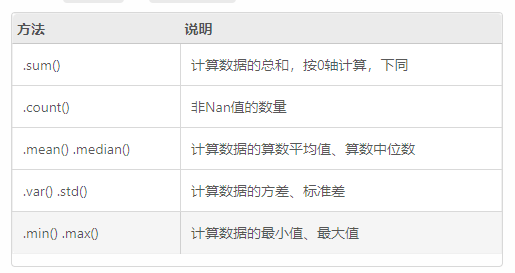

适用于 Series 类型的方法：
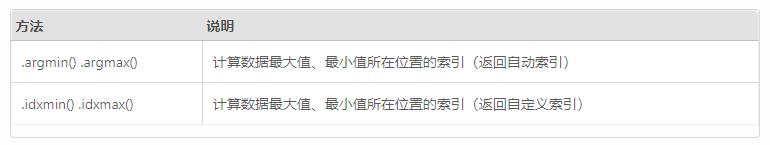

适用于 Series 和 DataFrame 类型：
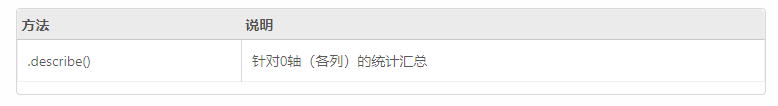

In [118]:
# 在0轴上的均值
print(df1.mean(axis=0))

0     7.5
1     8.5
2     9.5
3    10.5
4    11.5
dtype: float64


In [119]:
# 在1轴上的均值
print(df1.mean(axis=1))

c     2.0
a     7.0
b    12.0
d    17.0
dtype: float64
